
# **Kmeans**

Dado un conjunto de datos, se pretende agruparlos en clusters dependiendo de la distancia de cada elemento al centroide de cada grupo.

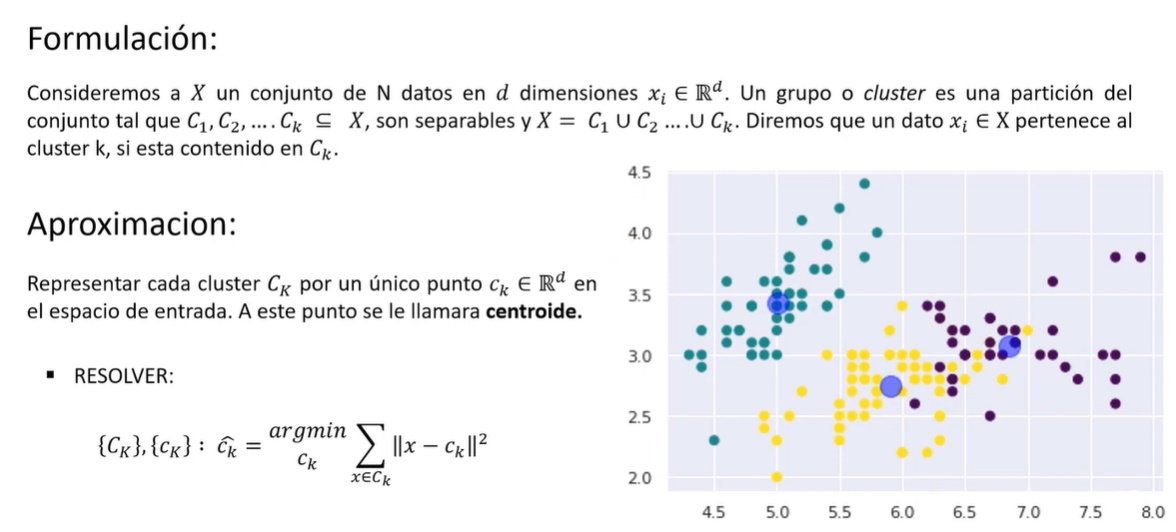


## 0. Ecuaciones

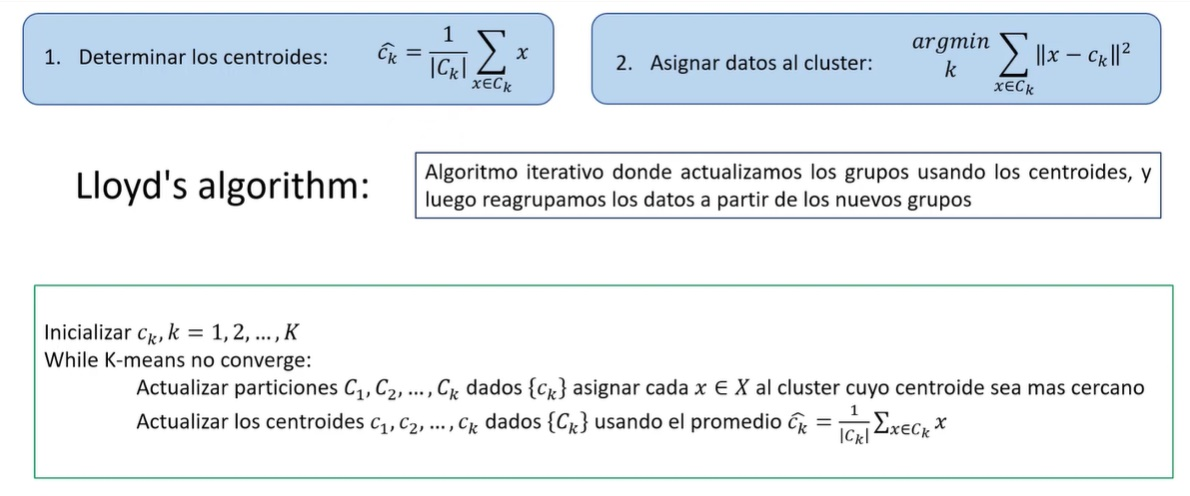

## 1. Revisión  del algoritmo

Dado un conjunto de datos X de dimensiones (10, 2) implementaremos el algoritmo para determinar dos clusters, en donde los elementos tienen características similares

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from scipy.spatial import distance

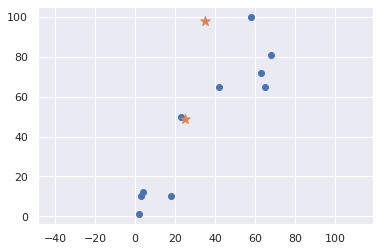

[35 98] [25 49]


In [2]:
# X Conjunto de datos de entrada. Dos características y 10 datos
X = np.array([[2,1],[3,10],[4,12],[18,10],[23,50],[65,65],[68,81],[63,72],[42,65],[58,100]])

plt.axis('equal')
plt.scatter(X[:,0],X[:,1])

# Iniciamos los centroides
ck = np.random.randint(np.min(X),np.max(X), size=(2, 2))

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

[35 98] [25 49]
iteración:  0


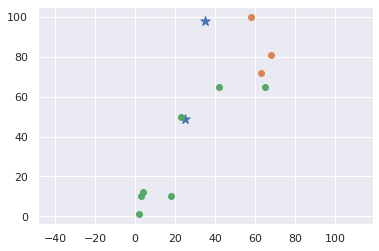

[63 84] [22 30]
iteración:  1


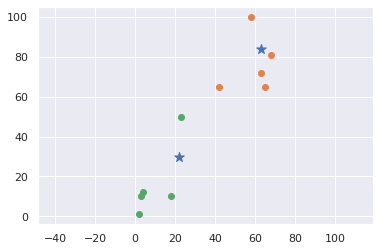

[59 76] [10 16]
iteración:  2


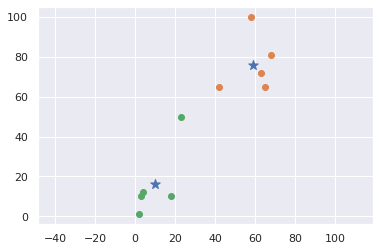

[59 76] [10 16]
iteración:  3


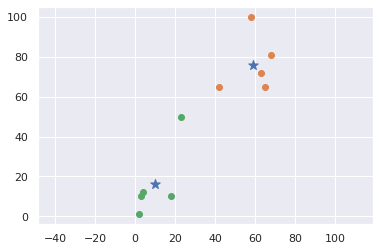

[59 76] [10 16]
iteración:  4


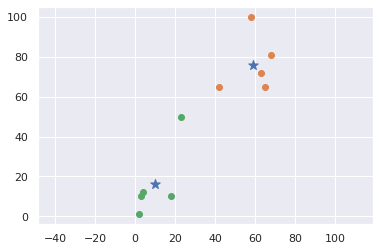

In [3]:
# Calculamos las distancias de cada dato al centroide y reasignamos a los conjuntos C1 y C2
for iteration in range(5):
  C1 = []
  C2 = []
  i=0
  print(ck[0,:],ck[1,:])
  for x in X:
    dst1 = distance.euclidean(X[i,:], ck[0,:])
    dst2 = distance.euclidean(X[i,:], ck[1,:])

    if dst1 < dst2:
      C1.append(X[i,:])
    else: 
      C2.append(X[i,:])
    i = i+1

  print('iteración: ', iteration)

  AC1=np.array(C1)
  AC2=np.array(C2)

  plt.axis('equal')
  plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
  plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
  plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
  plt.show()

  # Actualizamos las coordenadas de los centroides
  ck[0,0] = np.mean(AC1[:,0])
  ck[0,1] = np.mean(AC1[:,1])

  ck[1,0] = np.mean(AC2[:,0])
  ck[1,1] = np.mean(AC2[:,1])


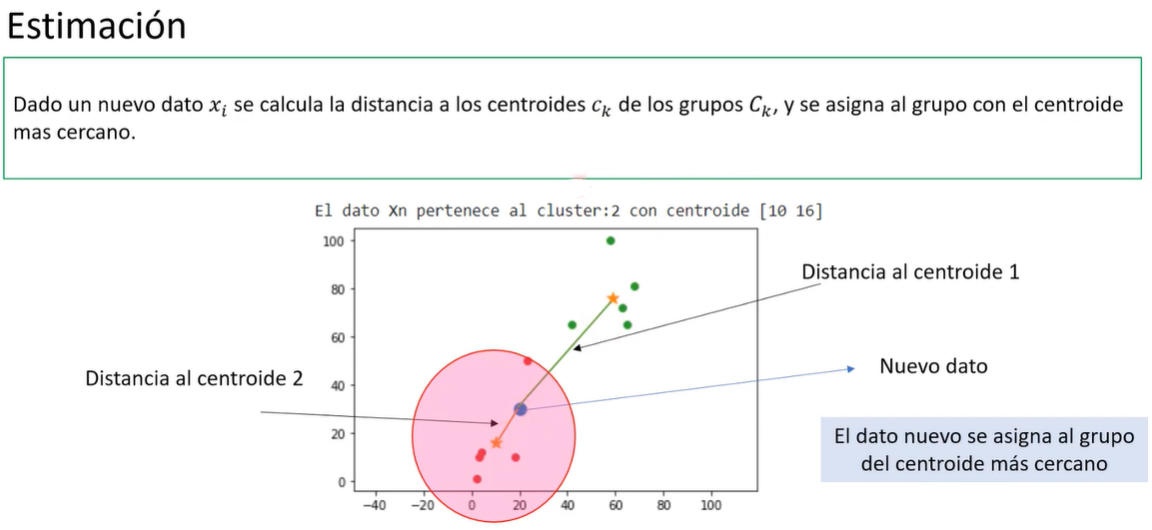

El dato Xn pertenece al cluster:2 con centroide [10 16]


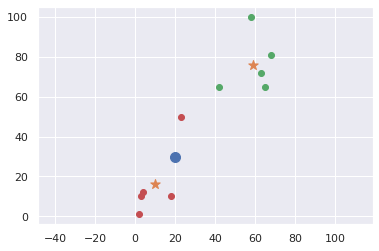

In [4]:
# Dado un nuevo dato xn, se asigna al conjunto C1 o C2 teniendo en cuenta la distancia
# del elemento a los centroides de cada grupo

# xn, nuevo dato
xn = (20, 30)

# Distancia de xn a cada centroide
dst1 = distance.euclidean(xn, ck[0, :])
dst2 = distance.euclidean(xn, ck[1, :])

if dst1 < dst2:
  print('El dato Xn pertenece al cluster:{} con centroide {}'.format(1, ck[0, :]))
else:
  print('El dato Xn pertenece al cluster:{} con centroide {}'.format(2, ck[1, :]))

  plt.axis('equal')
  
  plt.scatter(xn[0], xn[1], s=100, marker='o')
  plt.scatter(ck[:,0], ck[:,1], s=100, marker='*')
  plt.scatter(AC1[:,0], AC1[:,1], label='True Position')
  plt.scatter(AC2[:,0], AC2[:,1], label='True Position')
  plt.show()

## 2. Kmeans con Scikit Learn

Realizaremos la predicción de dígitos en imágenes usando Kmeans y la librería Sklearn

In [5]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0,stratify = digits.target)

In [7]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(Xtrain)

In [8]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  4.99600361e-16,  1.15942029e+00,
         1.11376812e+01,  9.75362319e+00,  1.36231884e+00,
         4.66293670e-15, -3.46944695e-16,  6.07153217e-18,
         5.79710145e-02,  7.11594203e+00,  1.46159420e+01,
         6.42753623e+00,  6.88405797e-01,  3.77475828e-15,
        -9.71445147e-17,  1.30104261e-18,  7.24637681e-01,
         1.24130435e+01,  9.60144928e+00,  1.03623188e+00,
         5.79710145e-02,  1.33226763e-15,  4.16333634e-17,
         0.00000000e+00,  2.30434783e+00,  1.37246377e+01,
         8.04347826e+00,  3.76086957e+00,  1.77536232e+00,
         1.01449275e-01,  1.30104261e-18,  0.00000000e+00,
         3.47826087e+00,  1.47971014e+01,  1.29130435e+01,
         1.23623188e+01,  1.02608696e+01,  2.69565217e+00,
         0.00000000e+00, -1.04083409e-17,  1.81884058e+00,
         1.44855072e+01,  1.06594203e+01,  5.45652174e+00,
         1.00869565e+01,  9.18115942e+00,  1.73913043e-01,
        -5.20417043e-18,  1.81159420e-01,  1.02898551e+0

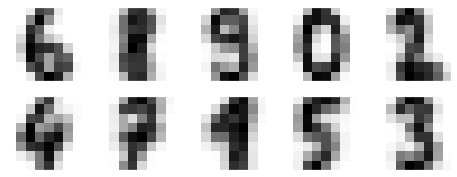

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
numbers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, number in zip(ax.flat, numbers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(number, interpolation='nearest', cmap=plt.cm.binary)

cluster 0
44 elementos


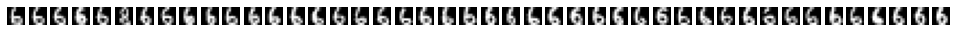

cluster 1
57 elementos


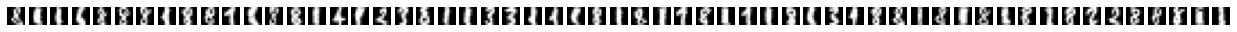

cluster 2
61 elementos


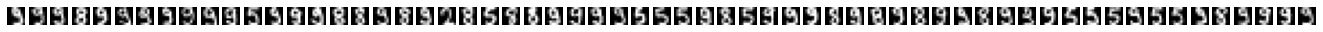

cluster 3
45 elementos


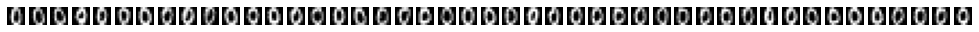

cluster 4
38 elementos


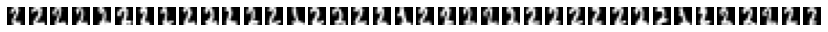

cluster 5
38 elementos


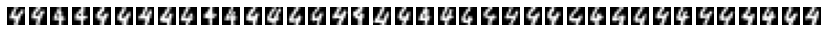

cluster 6
53 elementos


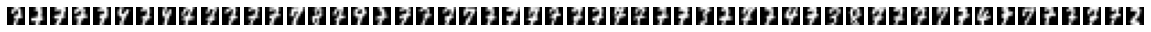

cluster 7
28 elementos


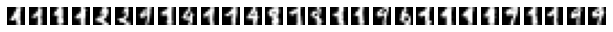

cluster 8
41 elementos


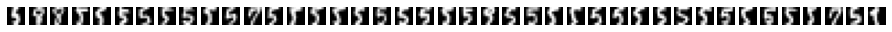

cluster 9
45 elementos


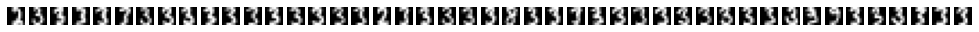

In [10]:
ypred = kmeans.predict(Xtest)

for i in range(0,10):

    row = np.where(ypred==i)[0]  # las filas en ypred que corresponden al cluster i
    num = row.shape[0]       #  Elementos de cada cluster
    r = np.floor(num/65)    #  Numero de filas para las figuras en el plot

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(25,5))
    for k in range(0, num):
        plt.subplot(r+1, 65, k+1)
        image = Xtest[row[k], ]
        image = image.reshape(8, 8)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

# IRIS

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Cargamos dataset de iris
iris = datasets.load_iris()

# Imprimimos especies y características
print(iris.target_names)
print(iris.feature_names)

# Dividimos datos para entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target,random_state=5,stratify = iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
# Creamos dataframe para los datos de entrenamiento y pruebas
import pandas as pd
X_test=pd.DataFrame({
    'sepal length':Xtest[:,0],
    'sepal width':Xtest[:,1],
    'petal length':Xtest[:,2],
    'petal width':Xtest[:,3],
    'species': ytest
})
X_train=pd.DataFrame({
    'sepal length':Xtrain[:,0],
    'sepal width':Xtrain[:,1],
    'petal length':Xtrain[:,2],
    'petal width':Xtrain[:,3],
    'species': ytrain
})


X_train.head()

,sepal length,sepal width,petal length,petal width,species
0,6.5,3.0,5.8,2.2,2
1,6.3,2.5,5.0,1.9,2
2,6.1,2.9,4.7,1.4,1
3,7.9,3.8,6.4,2.0,2
4,5.8,2.7,3.9,1.2,1


In [13]:
from sklearn.cluster import KMeans

# Se aplica el algoritmo y se encuentra los centroides de los grupos
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train.drop(["species"],axis = 1))

In [14]:
kmeans.cluster_centers_

array([[4.99473684, 3.43421053, 1.46842105, 0.25526316],
       [5.96875   , 2.75208333, 4.50208333, 1.46458333],
       [6.85769231, 3.12692308, 5.73846154, 2.1       ]])

In [15]:
import statistics as stat
import numpy as np

# Realizamos la predicción con los datos de prueba
y_pred = kmeans.predict(X_test.drop(["species"],axis = 1))

for i in range(0,3):

    row = np.where(y_pred==i)[0]  # Filas en y_pred que corresponden con el cluster i
    num = row.shape[0]       #  Elementos de cada cluster
    r = np.floor(num/10)    #  Numero de filas para las figuras en el plot

    print("cluster "+str(i))
    print(str(num)+" elementos")

    templist = []
    for k in range(0, num):
        templist.append(X_test.iloc[row[k], ].species)
    
    print('Clase asociada al cluster:',stat.mode(templist))

    

cluster 0
12 elementos
Clase asociada al cluster: 0.0
cluster 1
15 elementos
Clase asociada al cluster: 1.0
cluster 2
11 elementos
Clase asociada al cluster: 2.0


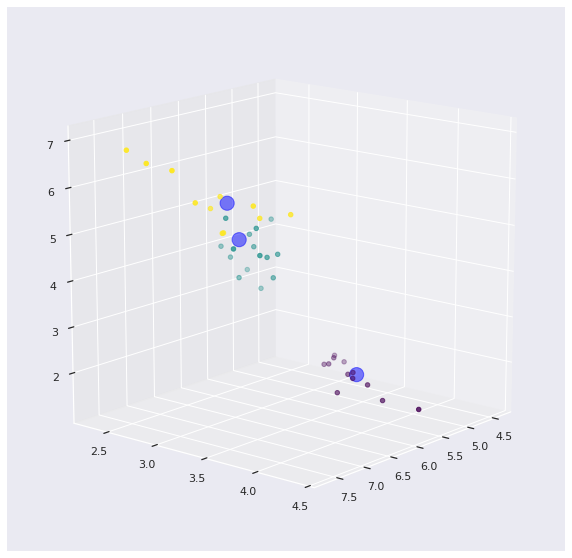

In [16]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(15, 40)

ax.scatter(X_test['sepal length'], X_test['sepal width'],X_test['petal length'],c=y_pred,cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c ='blue',s=200,alpha = 0.5)

plt.show()

In [17]:
y_pred

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1], dtype=int32)

In [18]:
ytest

array([0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1])

In [19]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(ytest,y_pred)
print(matriz)

[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]


Créditos: [Sistemas inteligentes](https://youtu.be/YBihRr1ZskM)